In [141]:
%pylab inline
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import time
data = []
datapath = '/home/bigdatas16/1101.csv'
data = pd.read_csv(datapath)
def MA(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    for i in dataList:
        if i - day + 1 >= 0:
            # 移動平均數 = 採樣天數的股價合計 / 採樣天數
            tmp = data['Close'][i-day+1:i+1].mean()
            tmpList.append(tmp)
        elif i - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['MA'+str(day)]=tmpSeries
# 乖離率(BIAS)
def BIAS_lag(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    tmpList.append(0)
    for item in dataList:
        if item-day+1 >= 0:
            tmp = (data['Close'][item]-data['MA'+str(day)][item])/(data['MA'+str(day)][item])*100
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)         
    tmpSeries = pd.Series(tmpList)
    data['BIAS'+str(day)] = tmpSeries

# Close Rise Ratio 漲幅比
def RR(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)

    for item in dataList:
        # 防止 第一筆data沒有更舊的
        if item - 1 >=0:
            # (今日收盤價 - 昨日收盤價)/昨日收盤價
            tmp = (data['Close'][item]-data['Close'][item-1])/data['Close'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  RR 欄位
    data['RR']=tmpSeries
RR(data)
# 相對強弱指標(RSI) 建議6
def RSI(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            # 6日RSI=100*6日內收盤上漲總幅度平均值 / (6日內收盤上漲總幅度平均值 - 6日內收盤下跌總幅度平均值)   
            bolRise = data['RR'][item-day+1-1:item+1-1] > 0
            #print(bolRise)
            meanRise = data['RR'][item-day+1-1:item+1-1][bolRise].mean()
            
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR'][item-day+1-1:item+1-1] < 0
            #print(bolDesc)
            meanDesc = data['RR'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
                
            #print(meanRise) 
            #print(meanDesc)

            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            #print(tmp)
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  RSI 欄位
    data['RSI'+str(day)] = tmpSeries

# High Rise Ratio 漲幅比
def RR_H(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)

    for item in dataList:
        # 防止 第一筆data沒有更舊的
        if item - 1 >=0:
            # (今日收盤價 - 昨日收盤價)/昨日收盤價
            tmp = (data['High'][item]-data['High'][item-1])/data['High'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    tmpSeries = pd.Series(tmpList)
    data['RR_H']=tmpSeries
RR_H(data)
# 相對強弱指標(RSI) 建議6
def RSI_H(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    for item in dataList:
        if item - day >= 0:
            bolRise = data['RR_H'][item-day+1-1:item+1-1] > 0
            meanRise = data['RR_H'][item-day+1-1:item+1-1][bolRise].mean()
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR_H'][item-day+1-1:item+1-1] < 0
            meanDesc = data['RR_H'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    tmpSeries = pd.Series(tmpList)
    data['RSI_H'+str(day)] = tmpSeries
    
# Volumn_n Rise Ratio 漲幅比
def RR_V(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)

    for item in dataList:
        if item - 1 >=0:
            tmp = (data['Volume_m'][item]-data['Volume_m'][item-1])/data['Volume_m'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['RR_V']=tmpSeries
RR_V(data)   
# 相對強弱指標(RSI) 建議6
def RSI_V(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    for item in dataList:
        if item - day >= 0:
            # 6日RSI=100*6日內收盤上漲總幅度平均值 / (6日內收盤上漲總幅度平均值 - 6日內收盤下跌總幅度平均值)   
            bolRise = data['RR_V'][item-day+1-1:item+1-1] > 0
            meanRise = data['RR_V'][item-day+1-1:item+1-1][bolRise].mean()
            
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR_V'][item-day+1-1:item+1-1] < 0
            meanDesc = data['RR_V'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
        tmpSeries = pd.Series(tmpList)
        data['RSI_V'+str(day)] = tmpSeries
def Cl_move_1(data):
    dataList = range(data['Date'].size)
    List = []
    List.append(0)
    for i in dataList:
        tmp = data['Close'][i]
        List.append(tmp)
    tmpSeries = pd.Series(List)
    data['Close1']=tmpSeries
Cl_move_1(data)
def WMS_lag(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    tmpList.append(0)
    for item in dataList:
        if item - day + 1 >= 0:
            tmp = 100*(data['High'][item-day+1:item+1].max() - data['Close'][item])/(data['High'][item-day+1:item+1].max() - data['Low'][item-day+1:item+1].min())
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['WMS' + str(day) +'_lag'] = tmpSeries
    
start = time.time()

for i in range(24):
    MA(data,1+i)
    BIAS_lag(data,1+i)
for i in range(2,18):
    RSI(data,i) 
for i in range(2,18):
    RSI_V(data,i) 
for i in range(2,18):
    RSI_H(data,i)

def MA(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    tmpList.append(0)
    for i in dataList:
        if i - day + 1 >= 0:
            tmp = data['Close'][i-day+1:i+1].mean()
            tmpList.append(tmp)
        elif i - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['MA'+str(day)]=tmpSeries
    
for i in range(60):
    MA(data,1+i)
for i in range(60):
    data["MA"+str(1+i)+"cross"] = data["Close1"][1+i:] - data["MA"+str(1+i)][1+i:]      
for i in range(55):
    data[("MA"+str(1+i))+("-MA"+str(i+6))] = data["MA"+str(1+i)][(i+1):] - data["MA" + str(6+i)][(i+6):]  
for i in range(18):
    WMS_lag(data,i+2)   
end = time.time()
print "Create features rsi : Time taken = %f second"%(end - start)  

data = data.drop(data.index[4620])
def UP_DOWN(data):
    data_day_number = range(data['Date'].size)
    tmpList = []
    
    for item in data_day_number:
        spread = data['Close'][item] - data['Open'][item]
        if spread > 0 :
            tmp = 1
        elif spread <= 0:
            tmp = 0
 
        tmpList.append(tmp)
    
    tmpSeries = pd.Series(tmpList)
    data['UP_DOWN']=tmpSeries
UP_DOWN(data)


Populating the interactive namespace from numpy and matplotlib
Create features rsi : Time taken = 477.131817 second


In [194]:
data.head(1)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,RR,...,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag,UP_DOWN
0,1998/1/3,12.84,12.84,12.6,12.6,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [235]:
data.info()
data1 = data.drop(['Date', 'Open', 'High','Low','Close','Close1','Volume_n','Volume_m','return','PE','RR','RR_V','RR_H'
                   ,'MA1','MA2','MA3','MA4','MA5','MA6','MA7','MA8','MA9','MA10','MA11','MA12','MA13','MA14'
                   ,'MA15','MA16','MA17','MA18','MA19','MA20','MA21','MA22','MA23','MA24','MA25','MA26','MA27'
                   ,'MA28','MA29','MA30','MA31','MA32','MA33','MA34','MA35','MA36','MA37','MA38','MA39','MA40'
                   ,'MA41','MA42','MA43','MA44','MA45','MA46','MA47','MA48','MA49','MA50','MA51','MA52','MA53'
                   ,'MA54','MA55','MA56','MA57','MA58','MA59','MA60'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4619
Columns: 279 entries, Date to UP_DOWN
dtypes: float64(277), int64(1), object(1)
memory usage: 9.9+ MB


In [216]:
data.head(1)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,RR,...,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag,UP_DOWN
0,1998/1/3,12.84,12.84,12.6,12.6,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [217]:
data1.columns[1:30]

Index([u'BIAS2', u'BIAS3', u'BIAS4', u'BIAS5', u'BIAS6', u'BIAS7', u'BIAS8',
       u'BIAS9', u'BIAS10', u'BIAS11', u'BIAS12', u'BIAS13', u'BIAS14',
       u'BIAS15', u'BIAS16', u'BIAS17', u'BIAS18', u'BIAS19', u'BIAS20',
       u'BIAS21', u'BIAS22', u'BIAS23', u'BIAS24', u'RSI2', u'RSI3', u'RSI4',
       u'RSI5', u'RSI6', u'RSI7'],
      dtype='object')

In [218]:
data1.columns[30:60]

Index([u'RSI8', u'RSI9', u'RSI10', u'RSI11', u'RSI12', u'RSI13', u'RSI14',
       u'RSI15', u'RSI16', u'RSI17', u'RSI_V2', u'RSI_V3', u'RSI_V4',
       u'RSI_V5', u'RSI_V6', u'RSI_V7', u'RSI_V8', u'RSI_V9', u'RSI_V10',
       u'RSI_V11', u'RSI_V12', u'RSI_V13', u'RSI_V14', u'RSI_V15', u'RSI_V16',
       u'RSI_V17', u'RSI_H2', u'RSI_H3', u'RSI_H4', u'RSI_H5'],
      dtype='object')

In [219]:
data1.columns[60:90]

Index([u'RSI_H6', u'RSI_H7', u'RSI_H8', u'RSI_H9', u'RSI_H10', u'RSI_H11',
       u'RSI_H12', u'RSI_H13', u'RSI_H14', u'RSI_H15', u'RSI_H16', u'RSI_H17',
       u'MA1cross', u'MA2cross', u'MA3cross', u'MA4cross', u'MA5cross',
       u'MA6cross', u'MA7cross', u'MA8cross', u'MA9cross', u'MA10cross',
       u'MA11cross', u'MA12cross', u'MA13cross', u'MA14cross', u'MA15cross',
       u'MA16cross', u'MA17cross', u'MA18cross'],
      dtype='object')

In [220]:
data1.columns[90:120]

Index([u'MA19cross', u'MA20cross', u'MA21cross', u'MA22cross', u'MA23cross',
       u'MA24cross', u'MA25cross', u'MA26cross', u'MA27cross', u'MA28cross',
       u'MA29cross', u'MA30cross', u'MA31cross', u'MA32cross', u'MA33cross',
       u'MA34cross', u'MA35cross', u'MA36cross', u'MA37cross', u'MA38cross',
       u'MA39cross', u'MA40cross', u'MA41cross', u'MA42cross', u'MA43cross',
       u'MA44cross', u'MA45cross', u'MA46cross', u'MA47cross', u'MA48cross'],
      dtype='object')

In [221]:
data1.columns[120:150]

Index([u'MA49cross', u'MA50cross', u'MA51cross', u'MA52cross', u'MA53cross',
       u'MA54cross', u'MA55cross', u'MA56cross', u'MA57cross', u'MA58cross',
       u'MA59cross', u'MA60cross', u'MA1-MA6', u'MA2-MA7', u'MA3-MA8',
       u'MA4-MA9', u'MA5-MA10', u'MA6-MA11', u'MA7-MA12', u'MA8-MA13',
       u'MA9-MA14', u'MA10-MA15', u'MA11-MA16', u'MA12-MA17', u'MA13-MA18',
       u'MA14-MA19', u'MA15-MA20', u'MA16-MA21', u'MA17-MA22', u'MA18-MA23'],
      dtype='object')

In [222]:
data1.columns[150:180]

Index([u'MA19-MA24', u'MA20-MA25', u'MA21-MA26', u'MA22-MA27', u'MA23-MA28',
       u'MA24-MA29', u'MA25-MA30', u'MA26-MA31', u'MA27-MA32', u'MA28-MA33',
       u'MA29-MA34', u'MA30-MA35', u'MA31-MA36', u'MA32-MA37', u'MA33-MA38',
       u'MA34-MA39', u'MA35-MA40', u'MA36-MA41', u'MA37-MA42', u'MA38-MA43',
       u'MA39-MA44', u'MA40-MA45', u'MA41-MA46', u'MA42-MA47', u'MA43-MA48',
       u'MA44-MA49', u'MA45-MA50', u'MA46-MA51', u'MA47-MA52', u'MA48-MA53'],
      dtype='object')

In [232]:
data1.columns[180:210]

Index([u'MA48-MA53', u'MA49-MA54', u'MA50-MA55', u'MA51-MA56', u'MA52-MA57',
       u'MA53-MA58', u'MA54-MA59', u'MA55-MA60', u'WMS2_lag', u'WMS3_lag',
       u'WMS4_lag', u'WMS5_lag', u'WMS6_lag', u'WMS7_lag', u'WMS8_lag',
       u'WMS9_lag', u'WMS10_lag', u'WMS11_lag', u'WMS12_lag', u'WMS13_lag',
       u'WMS14_lag', u'WMS15_lag', u'WMS16_lag', u'WMS17_lag', u'WMS18_lag'],
      dtype='object')

In [236]:
data1 = data1.fillna(-1)
cols = data1.columns.tolist()
#cols[205]

In [237]:
data1 = data1[[cols[205]] + cols[0:205]]
n = len(data['Date']) / 5
m = len(data['Date']) + 1 - n
train_data = data1.iloc[:m,:]

In [238]:
train_data.head(1)

,UP_DOWN,BIAS1,BIAS2,BIAS3,BIAS4,BIAS5,BIAS6,BIAS7,BIAS8,BIAS9,...,WMS10_lag,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
import time 
sql_sc = SQLContext(sc)
train_data.iloc[:(m/5),:]
train_data.iloc[(m/5):(2*m/5),:]
train_data.iloc[(2*m/5):(3*m/5),:]
train_data.iloc[(3*m/5):(5*m/5),:]
train_data.iloc[(4*m/5):m,:]

cross_data_list = [i for i in range(1,6)]
cross_data_list[0] = train_data.iloc[:(m/5),:]
cross_data_list[1] = train_data.iloc[(m/5):(2*m/5),:]
cross_data_list[2] = train_data.iloc[(2*m/5):(3*m/5),:]
cross_data_list[3] = train_data.iloc[(3*m/5):(5*m/5),:]
cross_data_list[4] = train_data.iloc[(4*m/5):m,:]
cross_data_pandas = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_data_pandas[i] = pd.DataFrame(cross_data_list[i])
#cross_data_pandas[4]

cross_sql = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_sql[i] = sql_sc.createDataFrame(cross_data_pandas[i])


assembler1 = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_V2","RSI_V3","RSI_V4","RSI_V5","RSI_V6"
                                       ,"RSI_V7","RSI_V8","RSI_V9","RSI_V10","RSI_V11","RSI_V12"
                                       ,"RSI_V13","RSI_V14","RSI_V15","RSI_V16","RSI_V17","RSI_H2"
                                       ,"RSI_H3","RSI_H4","RSI_H5","RSI_H6","RSI_H7","RSI_H8","RSI_H9"
                                       ,"RSI_H10","RSI_H11","RSI_H12","RSI_H13","RSI_H14","RSI_H15"
                                       ,"RSI_H16","RSI_H17","BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5"
                                       ,"BIAS6","BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23","BIAS24"
                                       ,'MA1cross','MA2cross','MA3cross','MA4cross','MA5cross','MA6cross'
                                       ,'MA7cross','MA8cross','MA9cross','MA10cross','MA11cross','MA12cross'
                                       ,'MA13cross','MA14cross','MA15cross','MA16cross','MA17cross','MA18cross'
                                       ,'MA19cross','MA20cross','MA21cross','MA22cross','MA23cross','MA24cross'
                                       ,'MA25cross','MA26cross','MA27cross','MA28cross','MA29cross','MA30cross'
                                       ,'MA31cross','MA32cross','MA33cross','MA34cross','MA35cross','MA36cross'
                                       #,'MA37cross','MA38cross','MA39cross','MA40cross','MA41cross','MA42cross'
                                       #,'MA43cross','MA44cross','MA45cross','MA46cross','MA47cross','MA48cross'
                                       #,'MA49cross','MA50cross','MA51cross','MA52cross','MA53cross','MA54cross'
                                       #,'MA55cross','MA56cross','MA57cross','MA58cross','MA59cross','MA60cross'
                                       #,'MA1-MA6','MA2-MA7','MA3-MA8','MA4-MA9','MA5-MA10','MA6-MA11','MA7-MA12'
                                       #,'MA8-MA13','MA9-MA14','MA10-MA15','MA11-MA16','MA12-MA17','MA13-MA18'
                                       #,'MA14-MA19','MA15-MA20','MA16-MA21','MA17-MA22','MA18-MA23','MA19-MA24'
                                       #,'MA20-MA25','MA21-MA26','MA22-MA27','MA23-MA28','MA24-MA29','MA25-MA30'
                                       #,'MA26-MA31','MA27-MA32','MA28-MA33','MA29-MA34','MA30-MA35','MA31-MA36'
                                       #,'MA32-MA37','MA33-MA38','MA34-MA39','MA35-MA40','MA36-MA41','MA37-MA42'
                                       #,'MA38-MA43','MA39-MA44','MA40-MA45','MA41-MA46','MA42-MA47','MA43-MA48'
                                       #,'MA44-MA49','MA45-MA50','MA46-MA51','MA47-MA52','MA48-MA53','MA49-MA54'
                                       #,'MA50-MA55','MA51-MA56','MA52-MA57','MA53-MA58','MA54-MA59'
                                       #,'MA55-MA60','WMS2_lag','WMS3_lag','WMS4_lag','WMS5_lag','WMS6_lag'
                                       #,'WMS7_lag','WMS8_lag','WMS9_lag','WMS10_lag','WMS11_lag','WMS12_lag'
                                       #,'WMS13_lag','WMS14_lag','WMS15_lag','WMS16_lag','WMS17_lag','WMS18_lag'
                                       ,'WMS19_lag'], outputCol="features")

In [246]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
import time 
sql_sc = SQLContext(sc)
train_data.iloc[:(m/5),:]
train_data.iloc[(m/5):(2*m/5),:]
train_data.iloc[(2*m/5):(3*m/5),:]
train_data.iloc[(3*m/5):(5*m/5),:]
train_data.iloc[(4*m/5):m,:]

cross_data_list = [i for i in range(1,6)]
cross_data_list[0] = train_data.iloc[:(m/5),:]
cross_data_list[1] = train_data.iloc[(m/5):(2*m/5),:]
cross_data_list[2] = train_data.iloc[(2*m/5):(3*m/5),:]
cross_data_list[3] = train_data.iloc[(3*m/5):(5*m/5),:]
cross_data_list[4] = train_data.iloc[(4*m/5):m,:]
cross_data_pandas = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_data_pandas[i] = pd.DataFrame(cross_data_list[i])
#cross_data_pandas[4]

cross_sql = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_sql[i] = sql_sc.createDataFrame(cross_data_pandas[i])

assembler1 = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_V2","RSI_V3","RSI_V4","RSI_V5","RSI_V6"
                                       ,"RSI_V7","RSI_V8","RSI_V9","RSI_V10","RSI_V11","RSI_V12"
                                       ,"RSI_V13","RSI_V14","RSI_V15","RSI_V16","RSI_V17","RSI_H2"
                                       ,"RSI_H3","RSI_H4","RSI_H5","RSI_H6","RSI_H7","RSI_H8","RSI_H9"
                                       ,"RSI_H10","RSI_H11","RSI_H12","RSI_H13","RSI_H14","RSI_H15"
                                       ,"RSI_H16","RSI_H17","BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5"
                                       ,"BIAS6","BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23","BIAS24"
                                       ,'MA1cross','MA2cross','MA3cross','MA4cross','MA5cross','MA6cross'
                                       ,'MA7cross','MA8cross','MA9cross','MA10cross','MA11cross','MA12cross'
                                       ,'MA13cross','MA14cross','MA15cross','MA16cross','MA17cross','MA18cross'
                                       ,'MA19cross','MA20cross','MA21cross','MA22cross','MA23cross','MA24cross'
                                       ,'MA25cross','MA26cross','MA27cross','MA28cross','MA29cross','MA30cross'
                                       ,'MA31cross','MA32cross','MA33cross','MA34cross','MA35cross','MA36cross'
                                       #,'MA37cross','MA38cross','MA39cross','MA40cross','MA41cross','MA42cross'
                                       #,'MA43cross','MA44cross','MA45cross','MA46cross','MA47cross','MA48cross'
                                       #,'MA49cross','MA50cross','MA51cross','MA52cross','MA53cross','MA54cross'
                                       #,'MA55cross','MA56cross','MA57cross','MA58cross','MA59cross','MA60cross'
                                       #,'MA1-MA6','MA2-MA7','MA3-MA8','MA4-MA9','MA5-MA10','MA6-MA11','MA7-MA12'
                                       #,'MA8-MA13','MA9-MA14','MA10-MA15','MA11-MA16','MA12-MA17','MA13-MA18'
                                       #,'MA14-MA19','MA15-MA20','MA16-MA21','MA17-MA22','MA18-MA23','MA19-MA24'
                                       #,'MA20-MA25','MA21-MA26','MA22-MA27','MA23-MA28','MA24-MA29','MA25-MA30'
                                       #,'MA26-MA31','MA27-MA32','MA28-MA33','MA29-MA34','MA30-MA35','MA31-MA36'
                                       #,'MA32-MA37','MA33-MA38','MA34-MA39','MA35-MA40','MA36-MA41','MA37-MA42'
                                       #,'MA38-MA43','MA39-MA44','MA40-MA45','MA41-MA46','MA42-MA47','MA43-MA48'
                                       #,'MA44-MA49','MA45-MA50','MA46-MA51','MA47-MA52','MA48-MA53','MA49-MA54'
                                       #,'MA50-MA55','MA51-MA56','MA52-MA57','MA53-MA58','MA54-MA59'
                                       #,'MA55-MA60','WMS2_lag','WMS3_lag','WMS4_lag','WMS5_lag','WMS6_lag'
                                       #,'WMS7_lag','WMS8_lag','WMS9_lag','WMS10_lag','WMS11_lag','WMS12_lag'
                                       #,'WMS13_lag','WMS14_lag','WMS15_lag','WMS16_lag','WMS17_lag','WMS18_lag'
                                       ,'WMS19_lag'], outputCol="features")
for i in range(0,5,1):
    cross_sql[i] = assembler1.transform(cross_sql[i])
    
frames = [i for i in range(1,6)]
for i in range(0,5):
    #print(i)
    frames[i] = pd.concat([cross_data_pandas[(i+1)%5],cross_data_pandas[(i+2)%5],cross_data_pandas[(i+3)%5],cross_data_pandas[(i+4)%5]])
    result_sql = [i for i in range(1,6)]

for i in range(0,5):   
    result_sql[i] = sql_sc.createDataFrame(frames[i])   
    
assembler1 = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_V2","RSI_V3","RSI_V4","RSI_V5","RSI_V6"
                                       ,"RSI_V7","RSI_V8","RSI_V9","RSI_V10","RSI_V11","RSI_V12"
                                       ,"RSI_V13","RSI_V14","RSI_V15","RSI_V16","RSI_V17","RSI_H2"
                                       ,"RSI_H3","RSI_H4","RSI_H5","RSI_H6","RSI_H7","RSI_H8","RSI_H9"
                                       ,"RSI_H10","RSI_H11","RSI_H12","RSI_H13","RSI_H14","RSI_H15"
                                       ,"RSI_H16","RSI_H17","BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5"
                                       ,"BIAS6","BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23","BIAS24"
                                       ,'MA1cross','MA2cross','MA3cross','MA4cross','MA5cross','MA6cross'
                                       ,'MA7cross','MA8cross','MA9cross','MA10cross','MA11cross','MA12cross'
                                       ,'MA13cross','MA14cross','MA15cross','MA16cross','MA17cross','MA18cross'
                                       ,'MA19cross','MA20cross','MA21cross','MA22cross','MA23cross','MA24cross'
                                       ,'MA25cross','MA26cross','MA27cross','MA28cross','MA29cross','MA30cross'
                                       ,'MA31cross','MA32cross','MA33cross','MA34cross','MA35cross','MA36cross'
                                       #,'MA37cross','MA38cross','MA39cross','MA40cross','MA41cross','MA42cross'
                                       #,'MA43cross','MA44cross','MA45cross','MA46cross','MA47cross','MA48cross'
                                       #,'MA49cross','MA50cross','MA51cross','MA52cross','MA53cross','MA54cross'
                                       #,'MA55cross','MA56cross','MA57cross','MA58cross','MA59cross','MA60cross'
                                       #,'MA1-MA6','MA2-MA7','MA3-MA8','MA4-MA9','MA5-MA10','MA6-MA11','MA7-MA12'
                                       #,'MA8-MA13','MA9-MA14','MA10-MA15','MA11-MA16','MA12-MA17','MA13-MA18'
                                       #,'MA14-MA19','MA15-MA20','MA16-MA21','MA17-MA22','MA18-MA23','MA19-MA24'
                                       #,'MA20-MA25','MA21-MA26','MA22-MA27','MA23-MA28','MA24-MA29','MA25-MA30'
                                       #,'MA26-MA31','MA27-MA32','MA28-MA33','MA29-MA34','MA30-MA35','MA31-MA36'
                                       #,'MA32-MA37','MA33-MA38','MA34-MA39','MA35-MA40','MA36-MA41','MA37-MA42'
                                       #,'MA38-MA43','MA39-MA44','MA40-MA45','MA41-MA46','MA42-MA47','MA43-MA48'
                                       #,'MA44-MA49','MA45-MA50','MA46-MA51','MA47-MA52','MA48-MA53','MA49-MA54'
                                       #,'MA50-MA55','MA51-MA56','MA52-MA57','MA53-MA58','MA54-MA59'
                                       #,'MA55-MA60','WMS2_lag','WMS3_lag','WMS4_lag','WMS5_lag','WMS6_lag'
                                       #,'WMS7_lag','WMS8_lag','WMS9_lag','WMS10_lag','WMS11_lag','WMS12_lag'
                                       #,'WMS13_lag','WMS14_lag','WMS15_lag','WMS16_lag','WMS17_lag','WMS18_lag'
                                       ,'WMS19_lag'],outputCol="features")
for i in range(0,5):  
    result_sql[i] = assembler1.transform(result_sql[i])

start = time.time()

cv5_test_error = []    
numTrees_maxDepth = []    
for j in range(1,7,1):
    for k in range(1,21,1):
        Test_Error = []
        for i in range(0,5):
            labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(result_sql[i])
            featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(result_sql[i])
            #rf = RandomForestClassifier(labelCol="labelIndexer", featuresCol="features")
            rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = k,maxDepth = j)
            # Chain indexers and forest in a Pipeline
            pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
            model = pipeline.fit(result_sql[i])
            predictions = model.transform(cross_sql[i])
            evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction")#, metricName="accuracy")
            accuracy = evaluator.evaluate(predictions)
            print("Test Error(%d) = %g" % (i,1.0 - accuracy))
            Test_Error.append(1.0 - accuracy)
        cv5_test_error.append(mean(Test_Error))
        numTrees_maxDepth.append([i,j])

end = time.time()
print "Cross Validation 5 Folds Hyperparameter Tuning : Time taken = %f second"%(end - start)
        
mintest = np.min(cv5_test_error)
c = []
for i in range(len(cv5_test_error)):
    c.append(np.min(cv5_test_error) == cv5_test_error[i])
    
for i in range(len(cv5_test_error)):    
    if c[i] == True:
        print(numTrees_maxDepth[i],mintest)       

Py4JJavaError: An error occurred while calling o57241.evaluate.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 12699.0 failed 1 times, most recent failure: Lost task 0.0 in stage 12699.0 (TID 12696, localhost): java.util.NoSuchElementException: key not found: -1.0
	at scala.collection.MapLike$class.default(MapLike.scala:228)
	at scala.collection.AbstractMap.default(Map.scala:58)
	at scala.collection.MapLike$class.apply(MapLike.scala:141)
	at scala.collection.AbstractMap.apply(Map.scala:58)
	at org.apache.spark.ml.feature.VectorIndexerModel$$anonfun$10.apply(VectorIndexer.scala:331)
	at org.apache.spark.ml.feature.VectorIndexerModel$$anonfun$10.apply(VectorIndexer.scala:309)
	at org.apache.spark.ml.feature.VectorIndexerModel$$anonfun$11.apply(VectorIndexer.scala:351)
	at org.apache.spark.ml.feature.VectorIndexerModel$$anonfun$11.apply(VectorIndexer.scala:351)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.execution.Project$$anonfun$1$$anonfun$apply$1.apply(basicOperators.scala:51)
	at org.apache.spark.sql.execution.Project$$anonfun$1$$anonfun$apply$1.apply(basicOperators.scala:49)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:191)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:64)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1431)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1419)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1418)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1418)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1640)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1599)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1588)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:620)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1832)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1845)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1858)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1929)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:927)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:926)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$countByKey$1.apply(PairRDDFunctions.scala:381)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$countByKey$1.apply(PairRDDFunctions.scala:381)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.PairRDDFunctions.countByKey(PairRDDFunctions.scala:380)
	at org.apache.spark.rdd.RDD$$anonfun$countByValue$1.apply(RDD.scala:1173)
	at org.apache.spark.rdd.RDD$$anonfun$countByValue$1.apply(RDD.scala:1173)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.RDD.countByValue(RDD.scala:1172)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.labelCountByClass$lzycompute(MulticlassMetrics.scala:43)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.labelCountByClass(MulticlassMetrics.scala:43)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.weightedFMeasure$lzycompute(MulticlassMetrics.scala:205)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.weightedFMeasure(MulticlassMetrics.scala:205)
	at org.apache.spark.ml.evaluation.MulticlassClassificationEvaluator.evaluate(MulticlassClassificationEvaluator.scala:83)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:57)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:606)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.util.NoSuchElementException: key not found: -1.0
	at scala.collection.MapLike$class.default(MapLike.scala:228)
	at scala.collection.AbstractMap.default(Map.scala:58)
	at scala.collection.MapLike$class.apply(MapLike.scala:141)
	at scala.collection.AbstractMap.apply(Map.scala:58)
	at org.apache.spark.ml.feature.VectorIndexerModel$$anonfun$10.apply(VectorIndexer.scala:331)
	at org.apache.spark.ml.feature.VectorIndexerModel$$anonfun$10.apply(VectorIndexer.scala:309)
	at org.apache.spark.ml.feature.VectorIndexerModel$$anonfun$11.apply(VectorIndexer.scala:351)
	at org.apache.spark.ml.feature.VectorIndexerModel$$anonfun$11.apply(VectorIndexer.scala:351)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.execution.Project$$anonfun$1$$anonfun$apply$1.apply(basicOperators.scala:51)
	at org.apache.spark.sql.execution.Project$$anonfun$1$$anonfun$apply$1.apply(basicOperators.scala:49)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:328)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:191)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:64)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	... 1 more


In [23]:
train_data = data1.iloc[:m,:]
train_sql = sql_sc.createDataFrame(train_data)
test_data = data1.iloc[m:,:]
test_sql = sql_sc.createDataFrame(test_data)

assembler1 = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_V2","RSI_V3","RSI_V4","RSI_V5","RSI_V6"
                                       ,"RSI_V7","RSI_V8","RSI_V9","RSI_V10","RSI_V11","RSI_V12"
                                       ,"RSI_V13","RSI_V14","RSI_V15","RSI_V16","RSI_V17","RSI_H2"
                                       ,"RSI_H3","RSI_H4","RSI_H5","RSI_H6","RSI_H7","RSI_H8","RSI_H9"
                                       ,"RSI_H10","RSI_H11","RSI_H12","RSI_H13","RSI_H14","RSI_H15"
                                       ,"RSI_H16","RSI_H17","BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5"
                                       ,"BIAS6","BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23","BIAS24"
                                       ,'MA1cross','MA2cross','MA3cross','MA4cross','MA5cross','MA6cross'
                                       ,'MA7cross','MA8cross','MA9cross','MA10cross','MA11cross','MA12cross'
                                       ,'MA13cross','MA14cross','MA15cross','MA16cross','MA17cross','MA18cross'
                                       ,'MA19cross','MA20cross','MA21cross','MA22cross','MA23cross','MA24cross'
                                       ,'MA25cross','MA26cross','MA27cross','MA28cross','MA29cross','MA30cross'
                                       ,'MA31cross','MA32cross','MA33cross','MA34cross','MA35cross','MA36cross'
                                       ,'MA37cross','MA38cross','MA39cross','MA40cross','MA41cross','MA42cross'
                                       ,'MA43cross','MA44cross','MA45cross','MA46cross','MA47cross','MA48cross'
                                       ,'MA49cross','MA50cross','MA51cross','MA52cross','MA53cross','MA54cross'
                                       ,'MA55cross','MA56cross','MA57cross','MA58cross','MA59cross','MA60cross'
                                       ,'MA1-MA6','MA2-MA7','MA3-MA8','MA4-MA9','MA5-MA10','MA6-MA11','MA7-MA12'
                                       ,'MA8-MA13','MA9-MA14','MA10-MA15','MA11-MA16','MA12-MA17','MA13-MA18'
                                       ,'MA14-MA19','MA15-MA20','MA16-MA21','MA17-MA22','MA18-MA23','MA19-MA24'
                                       ,'MA20-MA25','MA21-MA26','MA22-MA27','MA23-MA28','MA24-MA29','MA25-MA30'
                                       ,'MA26-MA31','MA27-MA32','MA28-MA33','MA29-MA34','MA30-MA35','MA31-MA36'
                                       ,'MA32-MA37','MA33-MA38','MA34-MA39','MA35-MA40','MA36-MA41','MA37-MA42'
                                       ,'MA38-MA43','MA39-MA44','MA40-MA45','MA41-MA46','MA42-MA47','MA43-MA48'
                                       ,'MA44-MA49','MA45-MA50','MA46-MA51','MA47-MA52','MA48-MA53','MA49-MA54'
                                       ,'MA50-MA55','MA51-MA56','MA52-MA57','MA53-MA58','MA54-MA59'
                                       ,'MA55-MA60','WMS2_lag','WMS3_lag','WMS4_lag','WMS5_lag','WMS6_lag'
                                       ,'WMS7_lag','WMS8_lag','WMS9_lag','WMS10_lag','WMS11_lag','WMS12_lag'
                                       ,'WMS13_lag','WMS14_lag','WMS15_lag','WMS16_lag','WMS17_lag','WMS18_lag'
                                       ,'WMS19_lag'],outputCol="features")
train_sql = assembler1.transform(train_sql)
labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(train_sql)
featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(train_sql)
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = 4,maxDepth = 6)
pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
model = pipeline.fit(train_sql)
assembler = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_V2","RSI_V3","RSI_V4","RSI_V5","RSI_V6"
                                       ,"RSI_V7","RSI_V8","RSI_V9","RSI_V10","RSI_V11","RSI_V12"
                                       ,"RSI_V13","RSI_V14","RSI_V15","RSI_V16","RSI_V17","RSI_H2"
                                       ,"RSI_H3","RSI_H4","RSI_H5","RSI_H6","RSI_H7","RSI_H8","RSI_H9"
                                       ,"RSI_H10","RSI_H11","RSI_H12","RSI_H13","RSI_H14","RSI_H15"
                                       ,"RSI_H16","RSI_H17","BIAS1", "BIAS2", "BIAS3","BIAS4","BIAS5"
                                       ,"BIAS6","BIAS7","BIAS8","BIAS9","BIAS10","BIAS11","BIAS12"
                                       ,"BIAS13","BIAS14","BIAS15","BIAS16","BIAS17","BIAS18"
                                       ,"BIAS19","BIAS20","BIAS21","BIAS22","BIAS23","BIAS24"
                                       ,'MA1cross','MA2cross','MA3cross','MA4cross','MA5cross','MA6cross'
                                       ,'MA7cross','MA8cross','MA9cross','MA10cross','MA11cross','MA12cross'
                                       ,'MA13cross','MA14cross','MA15cross','MA16cross','MA17cross','MA18cross'
                                       ,'MA19cross','MA20cross','MA21cross','MA22cross','MA23cross','MA24cross'
                                       ,'MA25cross','MA26cross','MA27cross','MA28cross','MA29cross','MA30cross'
                                       ,'MA31cross','MA32cross','MA33cross','MA34cross','MA35cross','MA36cross'
                                       ,'MA37cross','MA38cross','MA39cross','MA40cross','MA41cross','MA42cross'
                                       ,'MA43cross','MA44cross','MA45cross','MA46cross','MA47cross','MA48cross'
                                       ,'MA49cross','MA50cross','MA51cross','MA52cross','MA53cross','MA54cross'
                                       ,'MA55cross','MA56cross','MA57cross','MA58cross','MA59cross','MA60cross'
                                       ,'MA1-MA6','MA2-MA7','MA3-MA8','MA4-MA9','MA5-MA10','MA6-MA11','MA7-MA12'
                                       ,'MA8-MA13','MA9-MA14','MA10-MA15','MA11-MA16','MA12-MA17','MA13-MA18'
                                       ,'MA14-MA19','MA15-MA20','MA16-MA21','MA17-MA22','MA18-MA23','MA19-MA24'
                                       ,'MA20-MA25','MA21-MA26','MA22-MA27','MA23-MA28','MA24-MA29','MA25-MA30'
                                       ,'MA26-MA31','MA27-MA32','MA28-MA33','MA29-MA34','MA30-MA35','MA31-MA36'
                                       ,'MA32-MA37','MA33-MA38','MA34-MA39','MA35-MA40','MA36-MA41','MA37-MA42'
                                       ,'MA38-MA43','MA39-MA44','MA40-MA45','MA41-MA46','MA42-MA47','MA43-MA48'
                                       ,'MA44-MA49','MA45-MA50','MA46-MA51','MA47-MA52','MA48-MA53','MA49-MA54'
                                       ,'MA50-MA55','MA51-MA56','MA52-MA57','MA53-MA58','MA54-MA59'
                                       ,'MA55-MA60','WMS2_lag','WMS3_lag','WMS4_lag','WMS5_lag','WMS6_lag'
                                       ,'WMS7_lag','WMS8_lag','WMS9_lag','WMS10_lag','WMS11_lag','WMS12_lag'
                                       ,'WMS13_lag','WMS14_lag','WMS15_lag','WMS16_lag','WMS17_lag','WMS18_lag'
                                       ,'WMS19_lag'],outputCol="features")
test_sql = assembler.transform(test_sql)
predictions = model.transform(test_sql)
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction")#, metricName="accuracy")
#accuracy = evaluator.evaluate(predictions)
#accuracy

In [24]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
prediction_1101 = predictions.select("prediction", "indexedLabel")
prediction_1101_pandas = prediction_1101.toPandas()
cm = confusion_matrix(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'])
pd.crosstab(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'], rownames=['actual'], colnames=['preds'])

preds,0.0,1.0
actual,,
0.0,467,40
1.0,393,24


In [27]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

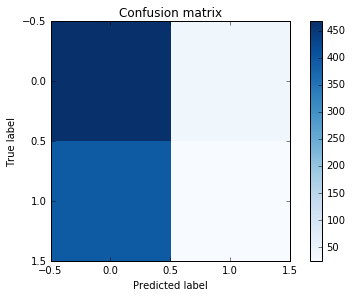

In [28]:
plot_confusion_matrix(cm)
plt.show()

當沖策略：每天都會買賣，預測漲買一張而預測跌則放空一張

一張一千股，買一張的價格等於股價乘上股數

In [78]:
data_p = data[['Close','Open']][(4621-n):4622].values
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])
result = np.c_[prediction_1101_pandas['indexedLabel'],prediction_1101_pandas['prediction']]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result2 = pd.concat([data_p1, result1], axis=1)
result2["Cl - Op"] = result2['Close'] - result2['Open']
result2['prediction'] = result2['prediction'].replace(0,-1)
result2['profit'] = 1000*result2['Open'] * result2['Cl - Op'] * result2['prediction']

In [79]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit
0,28.76,28.67,1.0,-1.0,0.09,-2580.3
1,28.67,28.76,1.0,1.0,-0.09,-2588.4
2,28.63,28.67,0.0,-1.0,-0.04,1146.8
3,28.29,28.50,0.0,-1.0,-0.21,5985.0
4,27.95,28.33,0.0,-1.0,-0.38,10765.4


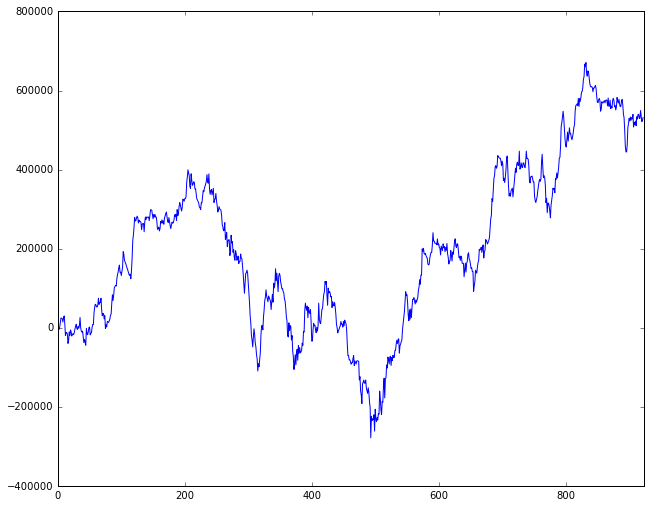

In [80]:
a = result2['profit'].cumsum()
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
a.plot()

In [81]:
result2['processing fee1'] = np.where(result2['prediction'] == 1,1000*(result2['Close']*(4.425/1000.0) + result2['Open']*(1.425/1000.0))*1
                                      ,1000*(result2['Close']*(1.425/1000.0) + result2['Open']*(4.425/1000.0)))
result2['profit_r_fee'] = result2['profit'] -  result2['processing fee1']

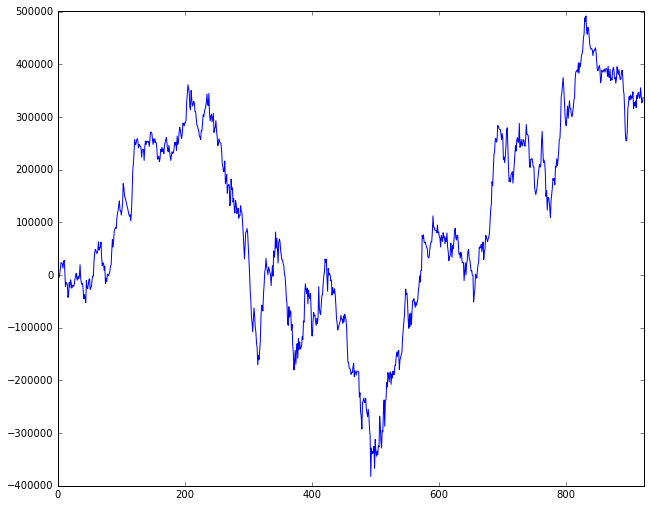

In [82]:
b = result2['profit_r_fee'].cumsum()
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
b.plot()

In [103]:
data_p = data[['Close','Open']][(4621-n):4622].values
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])
result = np.c_[prediction_1101_pandas['indexedLabel'],prediction_1101_pandas['prediction']]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result2 = pd.concat([data_p1, result1], axis=1)
result2["Cl - Op"] = result2['Close'] - result2['Open']
result2['prediction'] = result2['prediction'].replace(0,-1)
result2['profit'] = 1000*result2['Open'] * result2['Cl - Op'] * result2['prediction']
data_PE = data[['PE']][(4621-n):4622].values
data_PE = pd.DataFrame(data_PE,columns = ['PE'])
result2 = pd.concat([data_PE, result2], axis=1)

In [129]:
result2.head()

,PE,Close,Open,test,prediction,Cl - Op,profit,profit2,processing_fee_2
0,14.35,28.76,28.67,1.0,-1.0,0.09,-2580.3,0.0,0.0
1,14.30,28.67,28.76,1.0,1.0,-0.09,-2588.4,0.0,0.0
2,14.28,28.63,28.67,0.0,-1.0,-0.04,1146.8,0.0,0.0
3,14.11,28.29,28.50,0.0,-1.0,-0.21,5985.0,0.0,0.0
4,13.95,27.95,28.33,0.0,-1.0,-0.38,10765.4,0.0,0.0


In [124]:
result2['profit2'] = 0.0
result2['profit2'][0] = 0 
for i in range(5,len(result2)-1,1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == -1 and result2['PE'][i] < result2['PE'][i-5:i-1].mean():
        result2['profit2'][i+1] = result2['profit2'][i] + 1000 * (-1) * result2['Open'][i+1]
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i] 
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == 1 and result2['PE'][i] > result2['PE'][i-5:i-1].mean():
        result2['profit2'][i+1] = result2['profit2'][i] + 1000 * result2['Open'][i+1]
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == -1:
        result2['profit2'][i+1] = result2['profit2'][i] 

In [125]:
result2.head()

,PE,Close,Open,test,prediction,Cl - Op,profit,profit2,processing_fee_2
0,14.35,28.76,28.67,1.0,-1.0,0.09,-2580.3,0.0,0.0
1,14.30,28.67,28.76,1.0,1.0,-0.09,-2588.4,0.0,0.0
2,14.28,28.63,28.67,0.0,-1.0,-0.04,1146.8,0.0,0.0
3,14.11,28.29,28.50,0.0,-1.0,-0.21,5985.0,0.0,0.0
4,13.95,27.95,28.33,0.0,-1.0,-0.38,10765.4,0.0,0.0


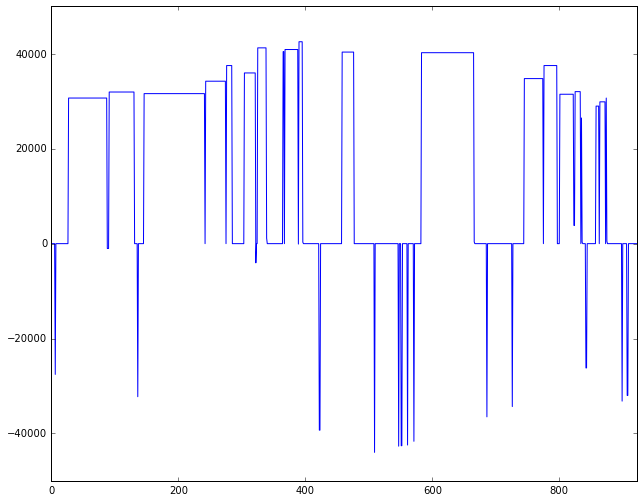

In [126]:
result2['profit2'].plot()

In [127]:
result2['processing_fee_2'] = 0.0
result2['processing_fee_2'][0] = 0#(-1) * result2['Open'][0]

for i in range(5,len(result2)-1,1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == -1 and result2['PE'][i] < result2['PE'][i-5:i-1].mean():
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + 1000 * (-1) * result2['Open'][i+1] - (1000 * result2['Open'][i+1])*((1.425/1000.0))
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == 1 and result2['PE'][i] > result2['PE'][i-5:i-1].mean():
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + 1000 * result2['Open'][i+1] - (1000 * result2['Open'][i+1])*(4.425/1000.0)
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == -1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]

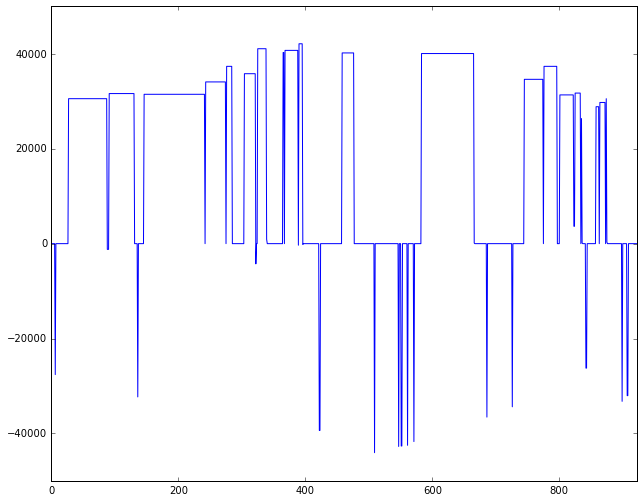

In [128]:
result2['processing_fee_2'].plot()#[1101:2301].plot()